<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>

<h1 style="text-align: center;">Evaluating Conversation Satisfaction</h1>

**What is Conversation Satisfaction?**: Conversation Satisfaction is a metric that determines how well a model/LLM answers the query asked by the user. It determines the user's satisfaction based on the conversation with the LLM/AI assistant.

It judges the conversation from various aspects. A few of them are listed below:
1. Completeness: All the queries of the user have been answered or not.
2. User's Acceptance: The user is satisfied with the given answers or not.

#### ConversationSatisfaction(

    user_persona: string  # The persona/role of the user asking the queries

    llm_persona: string  # The persona/role of the LLM answering the queries
    
#### )

Install UpTrain by running 'pip install uptrain'

In [1]:
chat= [{
    'conversation' : [
        {"role": "patient", "content": "Help"}, 
        {"role": "nurse", "content": "what do you need"}, 
        {"role": "patient", "content": "Having chest pain"}, 
        {"role": "nurse", "content": "please call 102"},
        {"role": "patient", "content": "Thank you nurse"}, 
    ]  
}, 
{
    'conversation' : [
        {"role": "patient", "content": "Help"}, 
        {"role": "nurse", "content": "what do you need"}, 
        {"role": "patient", "content": "Having chest pain"}, 
        {"role": "nurse", "content": "Sorry, I am not sure what that means"},
        {"role": "patient", "content": "You don't understand. Do something! I am having severe pain in my chest"}
    ]  
}]

In [2]:
from uptrain import EvalLLM, ConversationSatisfaction
import json

OPENAI_API_KEY = "sk-****************"  # Insert your OpenAI key here

In [4]:
eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = chat,
    checks = [ConversationSatisfaction(user_persona="patient", llm_persona="nurse")]
)

2023-12-19 16:50:35.211 | INFO     | uptrain.framework.evalllm:evaluate:100 - Sending evaluation request for rows 0 to <50 to the Uptrain


2023-12-19 16:50:47.148 | INFO     | uptrain.framework.evalllm:evaluate:100 - Sending evaluation request for rows 0 to <50 to the Uptrain
2023-12-19 16:50:57.619 | INFO     | uptrain.framework.evalllm:evaluate:100 - Sending evaluation request for rows 0 to <50 to the Uptrain


In [5]:
print(json.dumps(res,indent=3))

[
   {
      "conversation": [
         {
            "role": "patient",
            "content": "Help"
         },
         {
            "role": "nurse",
            "content": "what do you need"
         },
         {
            "role": "patient",
            "content": "Having chest pain"
         },
         {
            "role": "nurse",
            "content": "please call 102"
         },
         {
            "role": "patient",
            "content": "Thank you nurse"
         }
      ],
      "score_conversation_satisfaction": 1.0,
      "explanation_conversation_satisfaction": "1. The patient starts the conversation by saying \"Help.\" This indicates that they are in need of assistance or support.\n2. The nurse responds by asking what the patient needs. This shows that the nurse is attentive and willing to help.\n3. The patient then states that they are having chest pain. This is a serious symptom that requires immediate medical attention.\n4. The nurse advises the patient t

### Using UpTrain APIClient

You can also use the UpTrain's APIClient which provides advanced logging and dashboarding functionalities. 

Authentication: The next step involves setting the required environment variables - mainly the uptrain api key (for evaluating responses). You can create an account with UpTrain and generate the api key for free. Please visit https://uptrain.ai/

In [6]:
from uptrain import APIClient
UPTRAIN_API_KEY = "up-***************"

eval_client = APIClient(uptrain_api_key = UPTRAIN_API_KEY)

res = eval_client.log_and_evaluate(
    project_name = "Patient-Nurse Conversation Demo",
    data = chat,
    checks = [ConversationSatisfaction(user_persona="patient", llm_persona="nurse")]
)

2023-12-06 21:46:13.478 | INFO     | uptrain.framework.remote:log_and_evaluate:458 - Sending evaluation request for rows 0 to <50 to the Uptrain server


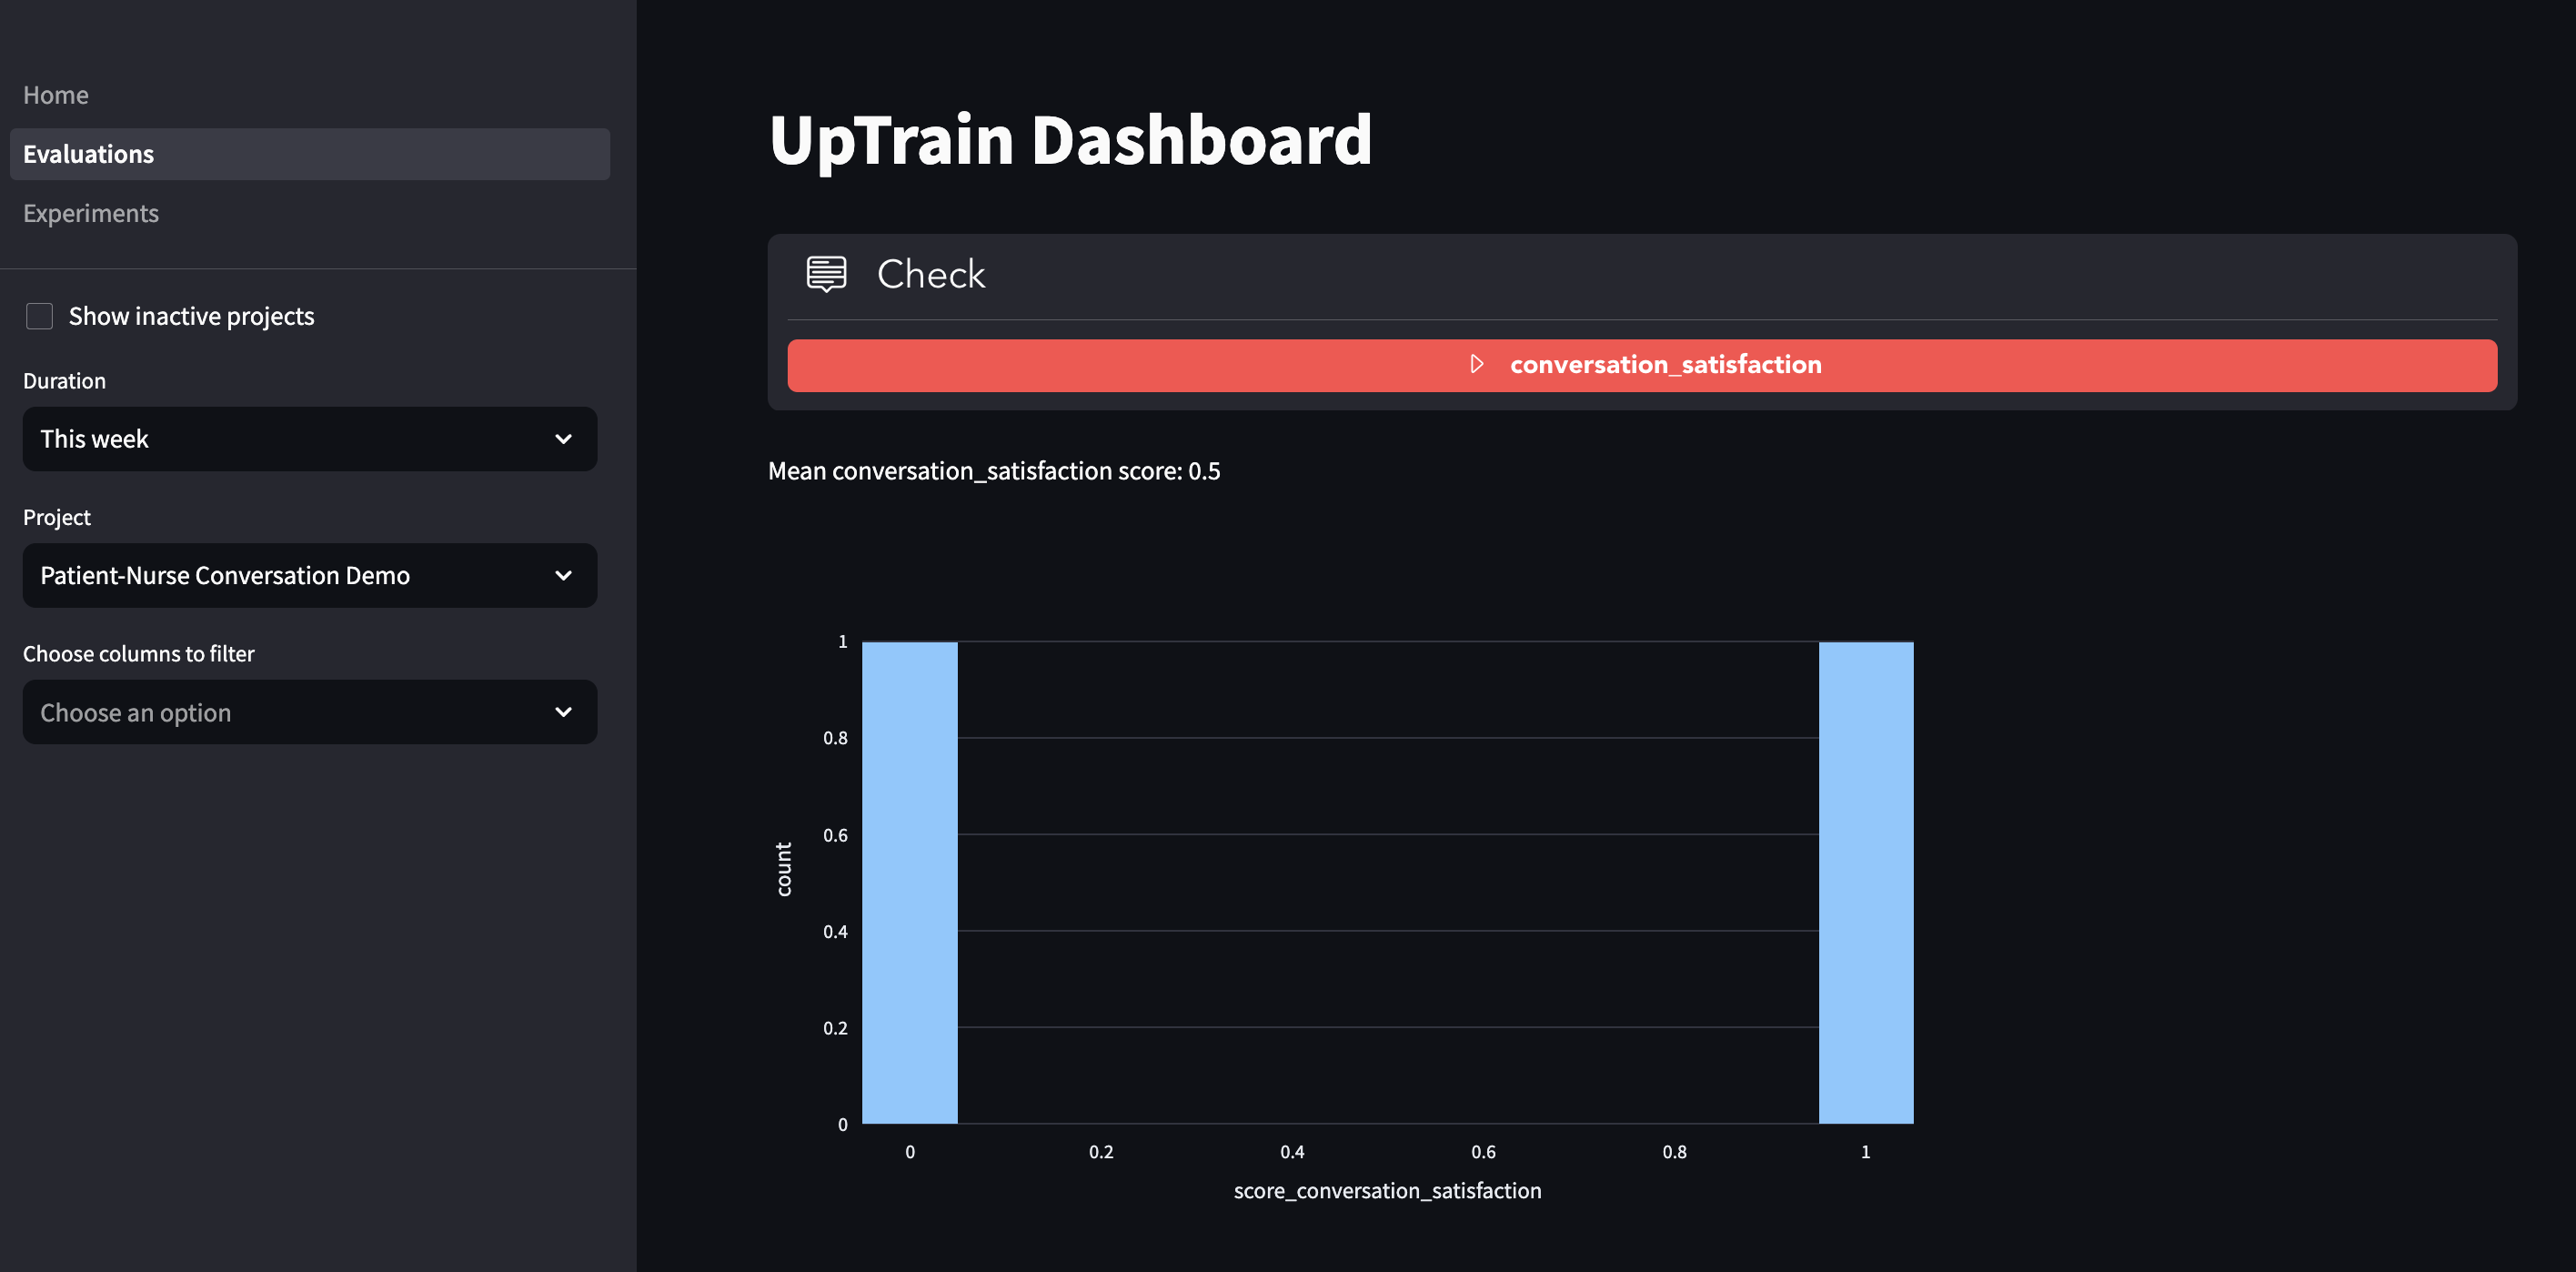